# Preesentación del proyecto

## Preparación y análisis exploratorio de los datos
En esta etapa se realizará una primera revisión de los datos que permita comprender cómo se componen los datasets y tener una noción general de la información. Una vez cargada la información y tras realizar algunos planteamientos iniciales, se procederá a recorrer los datos en busca de posibles errores en la información que deban ser solucionados (tipo de objeto, formato, valores duplicados, valores ausentes) 

Luego de haber limpiado y organizado la información, se procederá a añadir campos que permitan o faciliten la resolución de dudas, preguntas e hipótesis con base en los datos iniciales

## Entrenamiento de modelos
Dentro de esta sección se realizará el entrenamiento de los modelos basados en algoritmos especificos, de los cuales se obtendrán las métricas, importancia de características y otros elementos que permitan escoger el modelo más adecuado para la tarea, así como establecer una relación más clara entre las características y la variable objetivo

## Creación de clusteres
En esta etapa se realizará la categorización de los datos por medio de algoritmos de clasificación, con el objetivo de crear grupos de usuarios con características comunes, esto con la intención de crear segmentaciones para las futuras campañas que plantee el equipo de marketing

## Conclusiones y recomendaciones
---------------

# Descripción de los datos
- **Tabla Churn Rates** (Registros de la empresa con datos sobre los usuarios y su tasa de cancelación):

    - **churn**: cancelación para el mes en cuestión
    - **gender**
    - **near_location**: si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio
    - **partner**: si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes)
    - **promo_friends**: si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono)
    - **phone**: si el/la usuario/a aportó el número de teléfono
    - **age**
    - **lifetime**: el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio
    - **contract_period**: 1 mes, 3 meses, 6 meses o 1 año
    - **month_to_end_contract**: los meses que faltan hasta que expire el contrato
    - **group_visits**: si el/la usuario/a participa en sesiones grupales
    - **avg_class_frequency_total**: frecuencia media de visitas por semana a lo largo de la vida del cliente
    - **avg_class_frequency_current_month**: frecuencia media de visitas por semana durante el mes en curso
    - **avg_additional_charges_total**: cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc
--------------

# 1. Preparación de datos

In [1]:
# Carga inicial de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Carga y revisión inicial del dataset
df = pd.read_csv('/datasets/gym_churn_us.csv')

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# Análisis exploratorio de datos
print(f"Cantidad de valores duplicados: {df.duplicated().sum()}")
print(f"Cantidad de valores ausentes: {int((df.isna().sum()).mean())}")

df = df.astype('int')
df.columns = df.columns.str.lower()
df.drop(columns=['phone'], inplace=True)

display(df.describe())
print()
display(df.info())

Cantidad de valores duplicados: 0
Cantidad de valores ausentes: 0


,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,4.681250,0.412250,29.184250,146.438000,4.322750,3.724750,1.404000,1.303000,0.265250
std,0.499957,0.361711,0.499887,0.461932,4.549706,0.492301,3.258367,96.370579,4.191297,3.749267,0.980318,1.038971,0.441521
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,27.000000,68.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,29.000000,136.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.000000,6.000000,5.000000,2.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.000000,12.000000,31.000000,6.000000,6.000000,1.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   gender                             4000 non-null   int64
 1   near_location                      4000 non-null   int64
 2   partner                            4000 non-null   int64
 3   promo_friends                      4000 non-null   int64
 4   contract_period                    4000 non-null   int64
 5   group_visits                       4000 non-null   int64
 6   age                                4000 non-null   int64
 7   avg_additional_charges_total       4000 non-null   int64
 8   month_to_end_contract              4000 non-null   int64
 9   lifetime                           4000 non-null   int64
 10  avg_class_frequency_total          4000 non-null   int64
 11  avg_class_frequency_current_month  4000 non-null   int64
 12  churn              

None

In [4]:
# Valores medios agrupados por estado actual del usuario
display(df.groupby('churn').mean())

,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,5.747193,0.464103,29.976523,157.941817,5.283089,4.711807,1.547805,1.546444
1,0.510839,0.768143,0.355325,0.183789,1.728558,0.268615,26.989632,114.572102,1.662582,0.990575,1.005655,0.628652


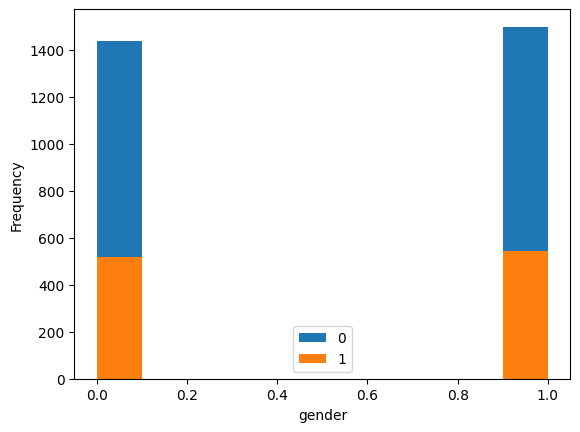

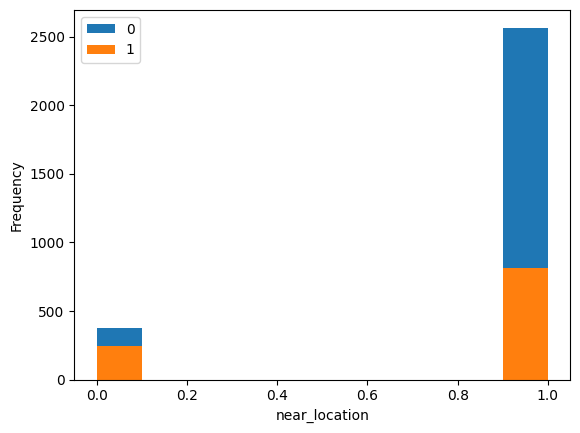

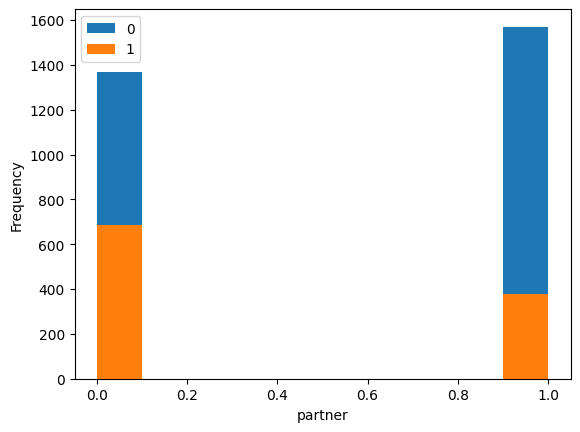

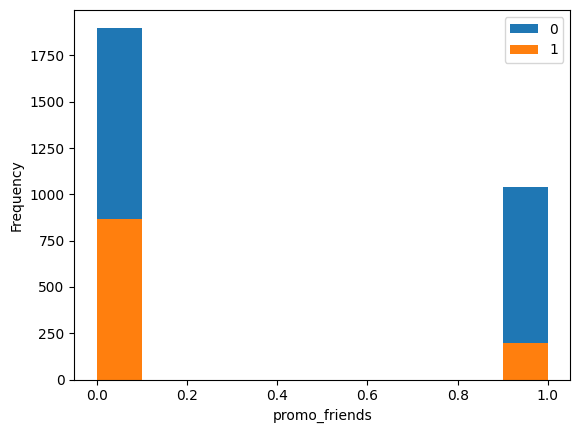

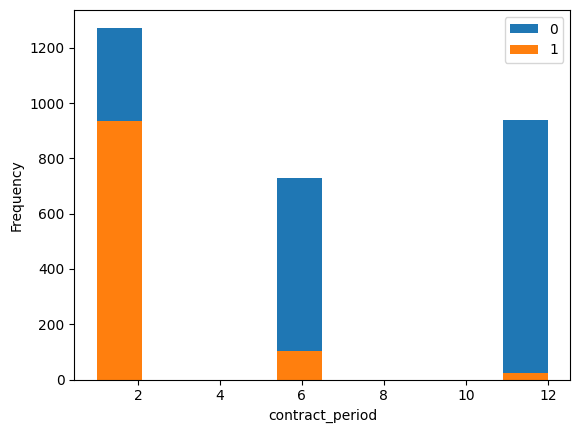

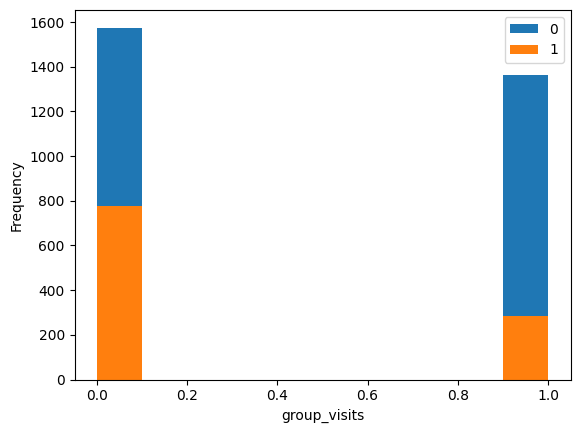

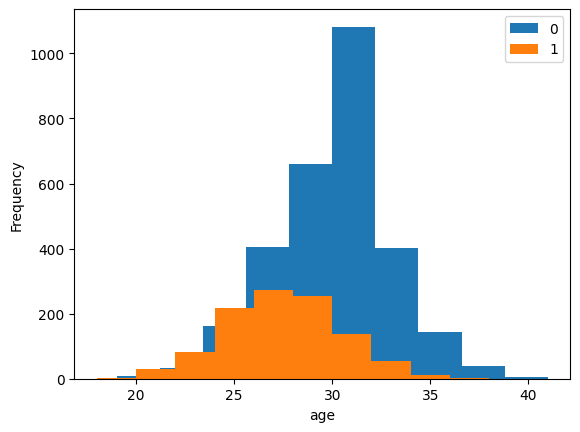

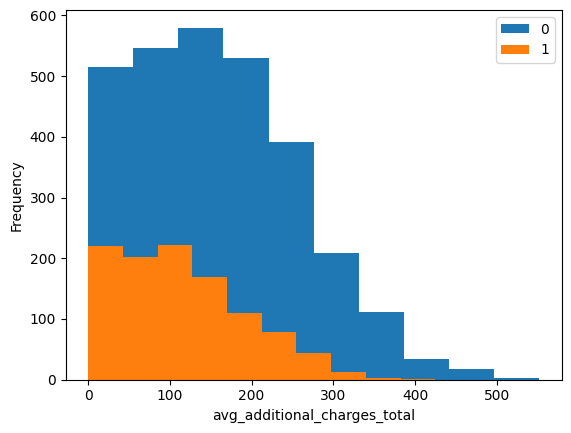

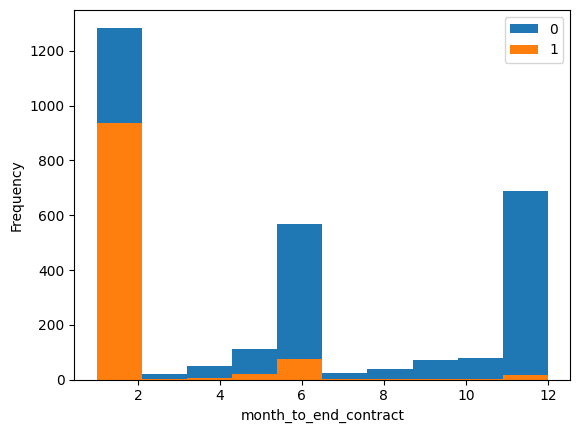

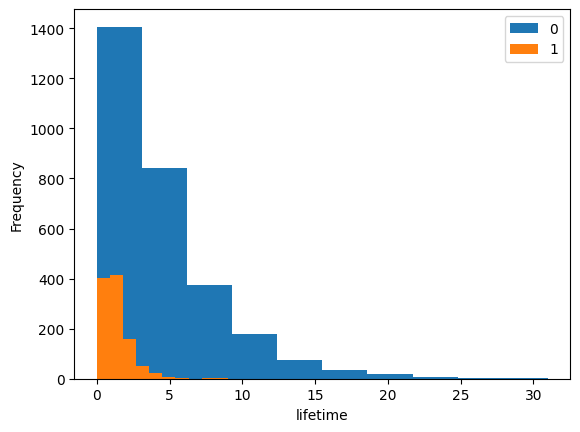

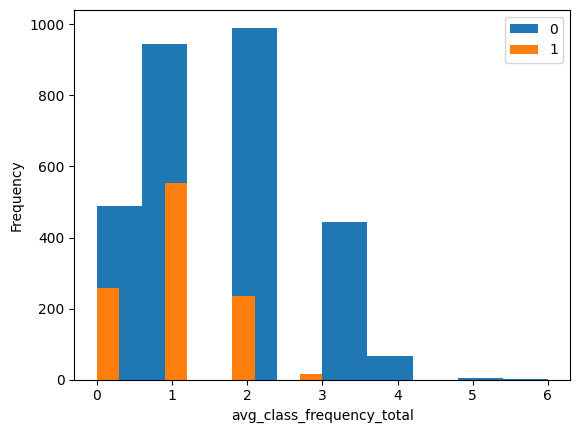

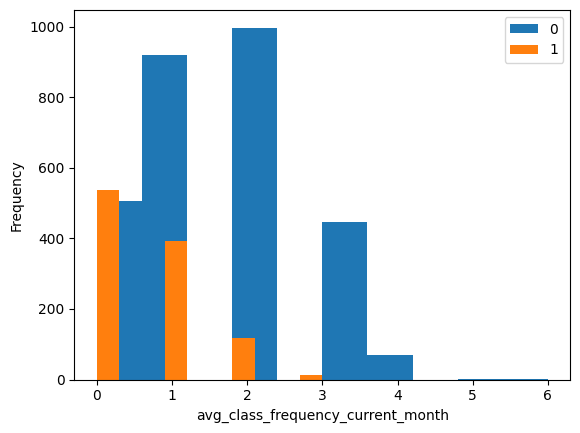

In [5]:
# Distribución de características
for col in df.drop(columns=['churn']).columns:
    df.groupby('churn')[col].plot(kind='hist', legend=True)
    plt.xlabel(col)
    plt.show()

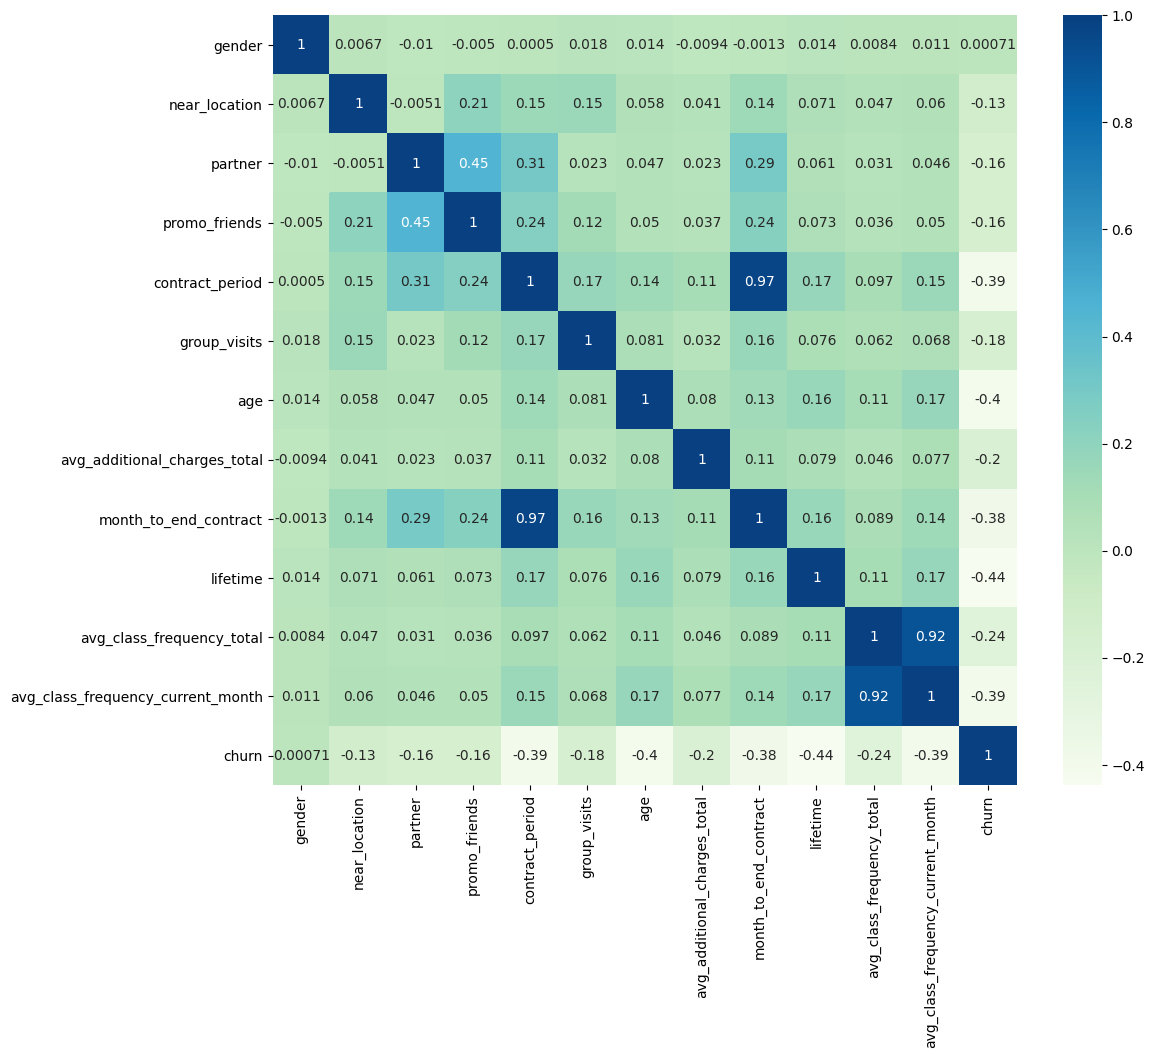

In [6]:
# Matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='GnBu')
plt.show()

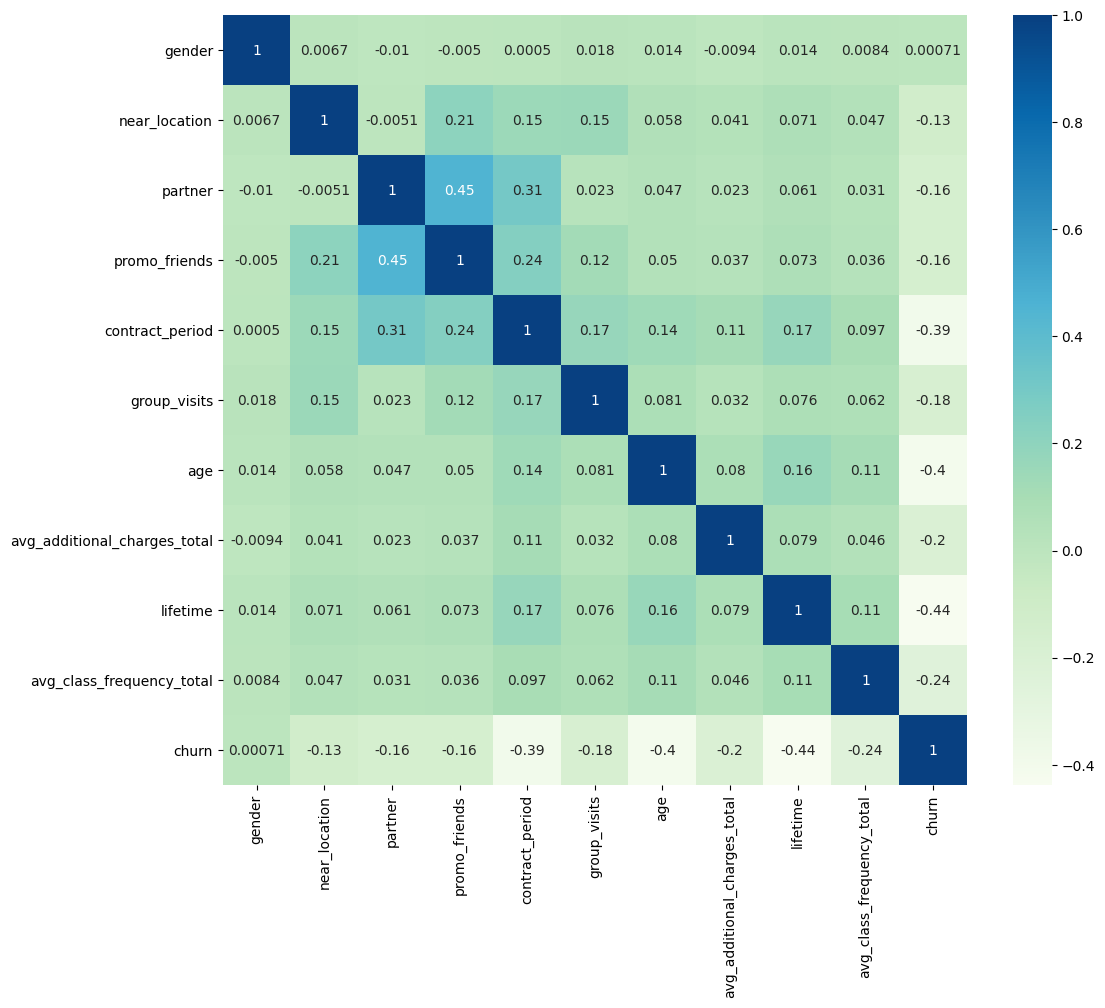

In [7]:
# Matriz de correlación corregida
df.drop(columns=['month_to_end_contract', 'avg_class_frequency_current_month'], inplace=True)

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='GnBu')
plt.show()

Comentarios:
1. No se encontraron valores ausentes ni filas duplicadas en el conjunto de datos
2. Luego de distribuir a los usuarios por su estado actual (activo-retirado), se logró identificar que:
    * La distribución de usuarios por genero parece no ser un factor determinante para predecir si los usuarios se retirarán
    * El valor medio de la distancia de residencia (near_location) parece influir en la permanencia de los usuarios, pues el valor es ligeramente menor para las personas que se han retirado, lo que implica que tienen que desplazarse más para llegar
    * De manera similar a lo anterior, las personas que no manejan convenios empresariales parecen ser más propensas a retirarse
    * La edad media de los usuarios que se retiran parece ser ligeramente menor
    * Se logró identificar que las personas más propensas a dejar el gimnasio no disfrutan de otros servicios ofrecidos en comparación con el gasto promedio de los usuarios activos
    * La mayoría de usuarios que abandonan no suelen durar más de 1 mes activos y suelen contratar paquetes de 3 meses o menos
    * Se pudo identificar que la proporción de usuarios activos que usaron un código promocional es aproximadamente el doble respecto a los usuarios inactivos
    * Se optó por descartar la característica "phone" debido a que parece no tener conexión alguna con el nivel de actividad o permanencia
3. Debido a la alta correlación entre ciertas características, se decidió eliminar 'month_to_end_contract' y 'avg_class_frequency_current_month' para evitar ruido en los cálculos futuros
4. Con base en la matriz de correlación se puede evidenciar que las características que parecen tener mayor relación con la permanencia de los usuarios son el tiempo que llevan inscritos (lifetime), duración del contrato (contract_period) y la edad (age)

# 2. Entrenamiento de modelos

In [8]:
# División de muestras
X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [9]:
# Preparación de modelos

# Estandarización de datos
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

X_test_s = scaler.transform(X_test)

# Entrenamiento de modelo de Regresión Logistica
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train_s, y_train)

logistic_pred = logistic_model.predict(X_test_s)

# Entrenamiento de modelo de Bosque Aleatorio
forest_model = RandomForestClassifier(random_state=2)
forest_model.fit(X_train_s, y_train)

forest_pred = forest_model.predict(X_test_s)

# Cálculo de métricas
def metric_calc (model, y_true, prediction):
    accuracy = accuracy_score(y_true, prediction)
    precision = precision_score(y_true, prediction)
    recall = recall_score(y_true, prediction)

    print(f'\033[1mMétricas para el modelo basado en {model} \033[0m')
    print(f'Accuracy: {round(accuracy*100,2)}%')
    print(f'Precision: {round(precision*100,2)}%')
    print(f'Recall: {round(recall*100,2)}%')
    
    return print()
    
metric_calc('LogisticRegressor', y_test, logistic_pred)
metric_calc('RandomForestClassifier', y_test, forest_pred)

Métricas para el modelo basado en LogisticRegressor 
Accuracy: 90.0%
Precision: 79.8%
Recall: 79.8%

Métricas para el modelo basado en RandomForestClassifier 
Accuracy: 88.25%
Precision: 77.08%
Recall: 74.75%



Métricas para el modelo basado en LogisticRegressor 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       602
           1       0.80      0.80      0.80       198

    accuracy                           0.90       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.90      0.90      0.90       800



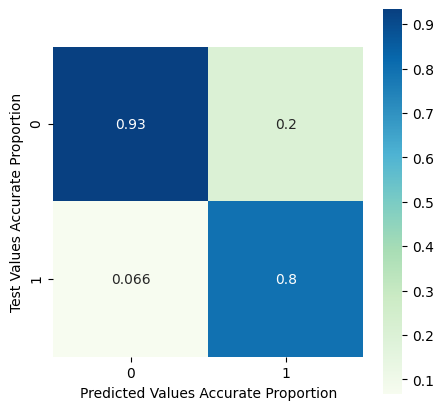


Métricas para el modelo basado en RandomForestClassifier 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       602
           1       0.77      0.75      0.76       198

    accuracy                           0.88       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.88      0.88      0.88       800



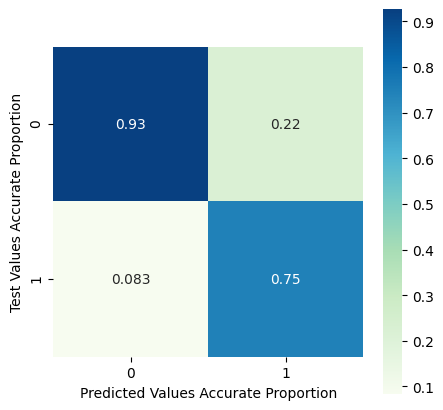

In [10]:
# Reportes de métricas
def metric_report (model, y_true, prediction):
    print(f'\033[1mMétricas para el modelo basado en {model} \033[0m')
    print(classification_report(y_true, prediction))

    matrix = confusion_matrix(y_true, prediction)
    matrix = matrix.astype('float')/matrix.sum(axis=1)

    plt.figure(figsize=(5,5))
    sns.heatmap(matrix, annot=True, cmap='GnBu', square=True)
    plt.xlabel('Predicted Values Accurate Proportion')
    plt.ylabel('Test Values Accurate Proportion')
    plt.show()
    
    return print()

metric_report('LogisticRegressor', y_test, logistic_pred)
metric_report('RandomForestClassifier', y_test, forest_pred)

In [11]:
# Importancia de las características

# Características según modelo de Regresión Logística
importances = pd.DataFrame.from_records(logistic_model.coef_)
importances.columns = X_train.columns
print(f'\033[1mImportancia de características para el modelo basado en LogisticRegression\033[0m')
print(importances.mean().sort_values())
print()

# Características según modelo de Arbol Aleatorio
importances = pd.DataFrame(forest_model.feature_importances_)
importances['feature'] = X_train.columns.map(lambda x: x)
importances.columns = ['importance', 'feature']
print(f'\033[1mImportancia de características para el modelo basado en RandomForestClassifier\033[0m')
print(importances.groupby('feature')['importance'].mean().sort_values(ascending=False))

Importancia de características para el modelo basado en LogisticRegression
lifetime                       -3.855854
contract_period                -1.294425
age                            -1.096228
avg_class_frequency_total      -0.693013
avg_additional_charges_total   -0.566166
group_visits                   -0.357803
promo_friends                  -0.223624
near_location                  -0.075246
partner                        -0.045617
gender                          0.043467
dtype: float64

Importancia de características para el modelo basado en RandomForestClassifier
feature
lifetime                        0.344235
avg_additional_charges_total    0.177651
age                             0.172105
contract_period                 0.124049
avg_class_frequency_total       0.076563
group_visits                    0.024851
gender                          0.023029
partner                         0.020557
promo_friends                   0.019616
near_location                   0.017344
Na

Comentarios:
1. Los modelos fueron entrenados utilizando valores estandarizados con el fin de comparar más facilmente los resultados
2. A partir de las métricas, matrices de confusión y los reportes, se pudo evidenciar que el modelo de Regresión Logística mostró un comportamiento más preciso que el Bosque Aleatorio
3. A partir de los coeficientes de las características se puede evidenciar que, independiente del modelo, el tiempo de permanencia del usuario (lifetime), la edad (age) y la frecuencia promedio de clases por mes son factores que estan directamente relacionados con la inclinación de los usuarios a dejar el gimnasio y que pueden ayudar a predecir si es probable que un usuario permanezca 

# 3. Creación de clusteres

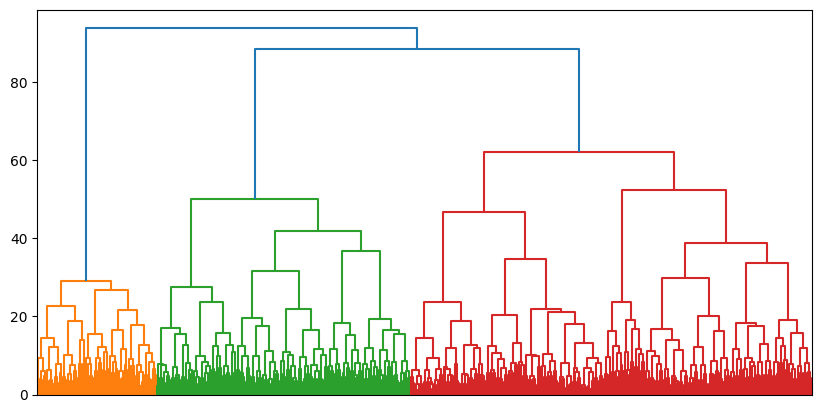

In [12]:
# Matriz de distancias basada en características estandarizadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(10,5))
dendrogram(linked, orientation='top')
plt.xticks(ticks=[])
plt.show()

In [13]:
# Entrenamiento de modelo de clasificación
km_model = KMeans(n_clusters=5, random_state=3)

predicted_labels = km_model.fit_predict(X_scaled)

# Valores medios de característica para los clústeres
predicted_labels = pd.Series(predicted_labels.astype('str'), name='labels')
labeled_data = df.join(predicted_labels)

display(labeled_data.groupby('labels').mean())

,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
labels,,,,,,,,,,,
0,0.493162,0.996581,0.959829,0.835043,7.951282,0.511966,29.589744,153.313675,3.582906,1.472650,0.121368
1,0.557276,0.959752,0.439628,0.241486,5.938080,0.526316,30.167183,167.708978,12.650155,1.681115,0.000000
2,1.000000,1.000000,0.193286,0.075280,2.994914,0.406918,28.890132,141.781282,2.536114,1.383520,0.359105
3,0.000000,1.000000,0.211497,0.065076,3.015184,0.373102,28.965293,141.854664,2.637744,1.318872,0.348156
4,0.500000,0.000000,0.493355,0.074751,2.956811,0.225914,28.684385,136.285714,2.817276,1.285714,0.406977


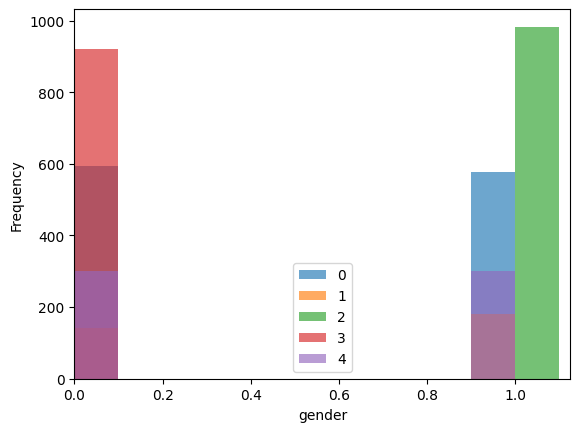

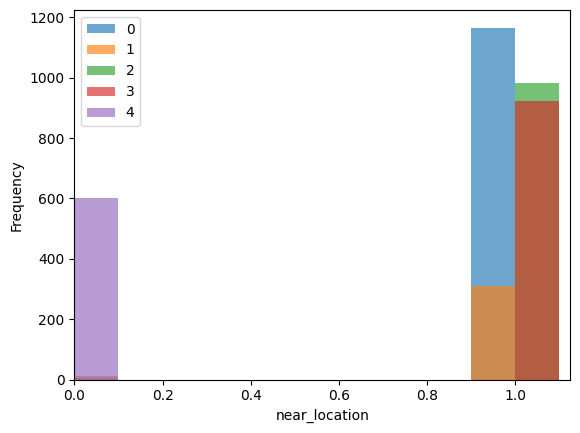

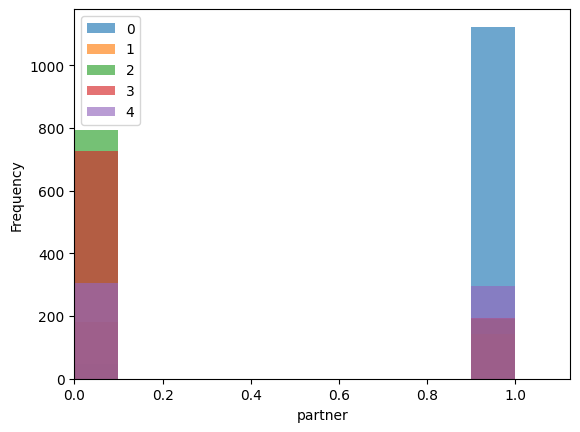

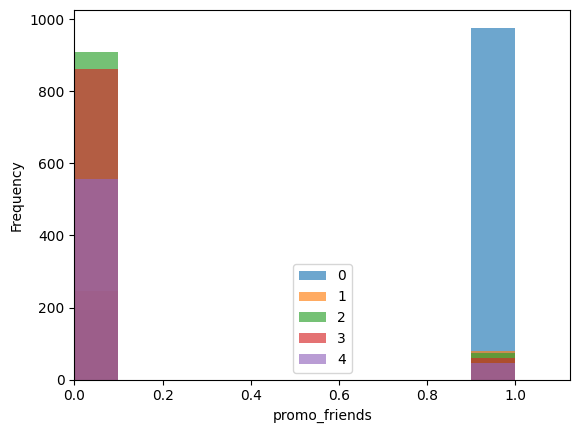

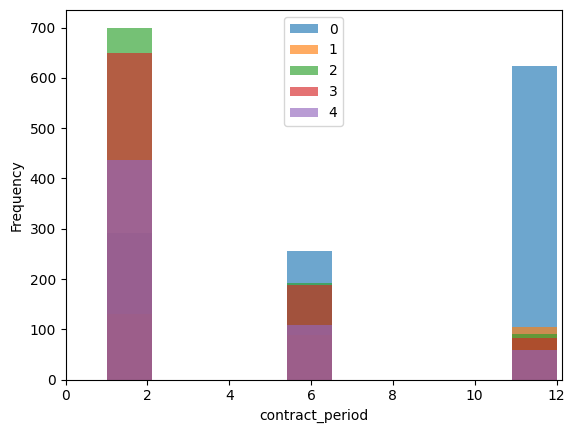

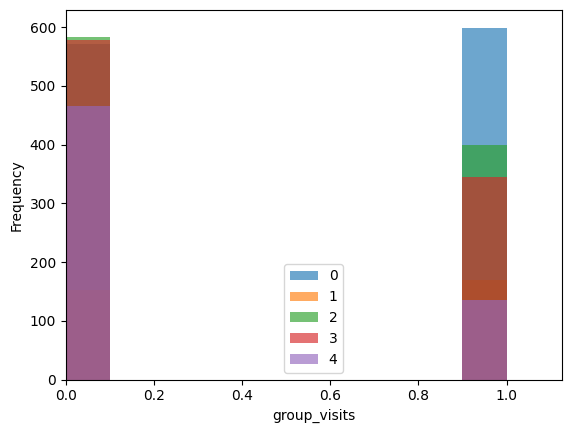

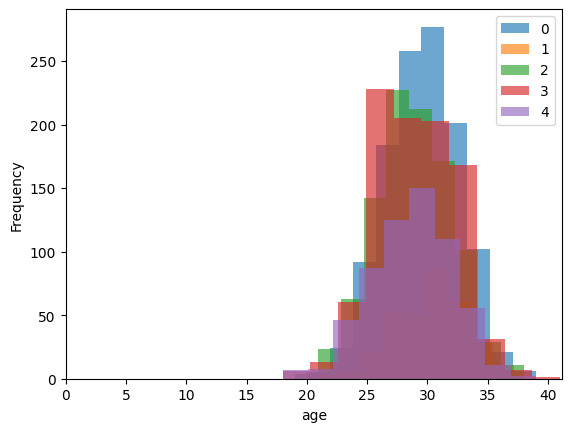

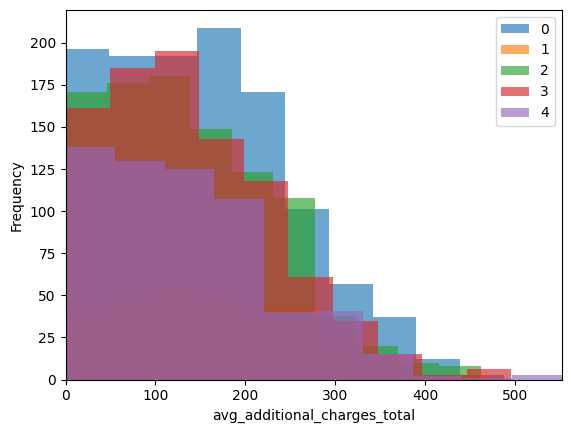

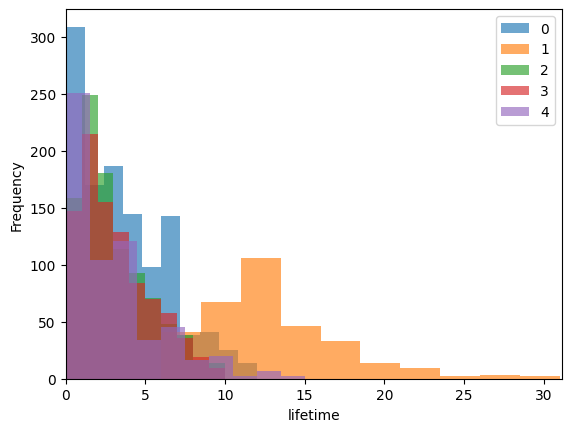

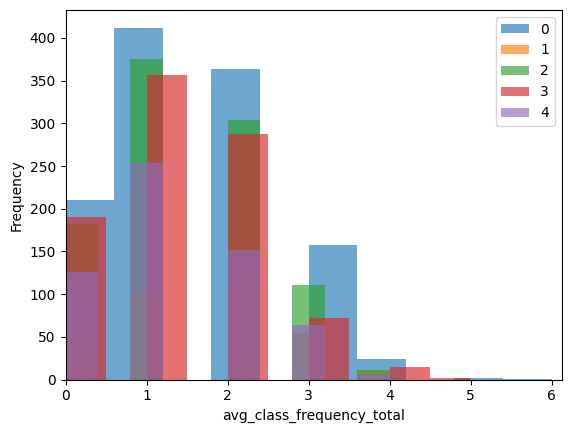

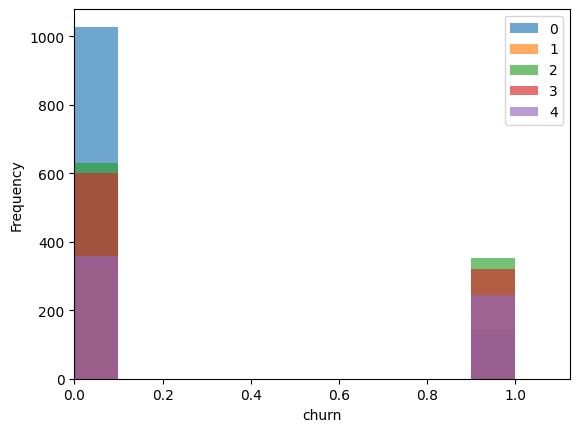

In [14]:
# Distribución de características para los clústeres
for col in labeled_data.drop(columns=['labels']).columns:
    labeled_data.groupby('labels')[col].plot(kind='hist', legend=True, alpha=0.65)
    plt.xlabel(col)
    plt.xlim(0, labeled_data[col].max()+0.125)
    plt.show()

In [15]:
# Tasa de cancelación para cada clúster
retention = labeled_data.groupby('labels')['churn'].mean().reset_index(name='Cancel Rate (%)')
retention['Retention Rate (%)'] = retention['Cancel Rate (%)'].map(lambda x: round((1-x)*100,2))
retention['Cancel Rate (%)'] = round(retention['Cancel Rate (%)']*100, 2)

print(retention.sort_values(by='Cancel Rate (%)', ascending=False))

  labels  Cancel Rate (%)  Retention Rate (%)
4      4            40.70               59.30
2      2            35.91               64.09
3      3            34.82               65.18
0      0            12.14               87.86
1      1             0.00              100.00


Comentarios:
1. A partir de los valores medios obtenidos para cada grupo, se puede mencionar que:
    * El clustering se realizó de tal manera que los dos primeros grupos tengan valores equilibrados de usuarios por genero, mientras que los grupos 2 y 3 solo incluyen usuarios de uno u otro genero. Finalmente, el grupo 4 contiene exactamente la misma cantidad de usuarios para cada género
    * La agrupación distribuyó las edades de casi la misma manera para cada grupo, teniendo todos una edad media que ronda entre 29 y 30 años
    * En términos generales, el grupo 4 es el que muestra los valores medios más bajos para la mayoría de las características, lo que se vió reflejado en la tasa de retención asociada a este grupo
    * Tal como se evidenció durante el entrenamiento de los modelos en la parte anterior, los grupos con menor frecuencia de clases grupales y tiempo total de actividad son más propensas a abandonar
    * Del clustering se obtuvo información importante sobre la edad, ya que al estar todos los grupos distribuidos de forma tan similar, se evidencia que hay otras características que pueden relacionarse también con las tasas de abandono
    * Se puede resaltar que como resultado del clustering, los grupos de personas que contraten planes de menos de 3 meses o que lleven menos se dicho tiempo entrenando, son mucho más propensas a abandonar

# 4. Conclusiones y recomendaciones

1. Con base en el análisis, se recomienda evaluar el aumento de convenios y promociones, puesto que se evidencia una mayor tendencia a permanecer si el usuario cuenta con alguno de estos beneficios
2. La edad y tiempo de actividad del usuario se consideran 2 de las caracteristicas más importantes para los modelos de predicción, por lo que se considera importante el poder desarrollar campañas de marketing enfocadas en los diferentes rangos que componen estas categorías, de manera que se pueda maximizar el interés de los usuarios con base en sus caracteristicas particulares
3. Relacionado con lo anterior, los resultados del agrupamiento (clustering) reflejaron que aunque la edad puede ser un factor importante, el más relevante de todos continúa siendo el tiempo de actividad (lifetime), el cual se puede comenzar a analizar en etapas tempranas a partir del periodo de contrato solicitado por el usuario (contract_period)
4. En general se considera importante desarrollar estrategias que incentiven la participación en clases grupales, bien sea a través de llamar la atención de la audiencia o de diseñar estos espacios con base en las preferencias de los distintos segmentos que asisten al gimnasio
5. Dado que el volumen de gastos adicionales dentro del gimnasio está bastante asociado con el nivel de fidelidad de los usuarios, se recomienda evaluar estrategias que comiencen a captar la atención de aquellos usuarios propensos a abandonar, con el objetivo de generar en ellos una sensación de valor agregado que pueda contribuir a su posible fidelización